<a href="https://colab.research.google.com/github/Eswarankam002/FMML_Projects_and_Labs/blob/main/FMML_2024_Module_5_Lab_1_NL_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 5 Lab 1

# Non Linear Support Vector Machines

```
Module Coordinator : Nikunj Nawal
```



## SVMs Recap:

![SVM](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png)

SVMs are an iterative approach of trying to find the optimal hyperplane that divides the multidimentional space into different classes present in the dataset.


**Hyperplanes:** These are the decision planes that separate the objects of classes that we are trying to classify.

**Support Vectors** : Support vectors are the points from dataset that are closest to the hyperplane that divides the dataset.

**Margin**:  The gap between the closest support vectors from the different class along the direction perpendicular to the hyperplane. Simply put, it is the sum of perpendicular distance of the support vector of each class to the hyperplane.

---

In [13]:
# Importing the necessary packages
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn import svm

import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt


The topic of classifier in today's lab, SVMs make for really good linear separators. Let us look at an example which has linearly separable data:

(100, 2) (100,)


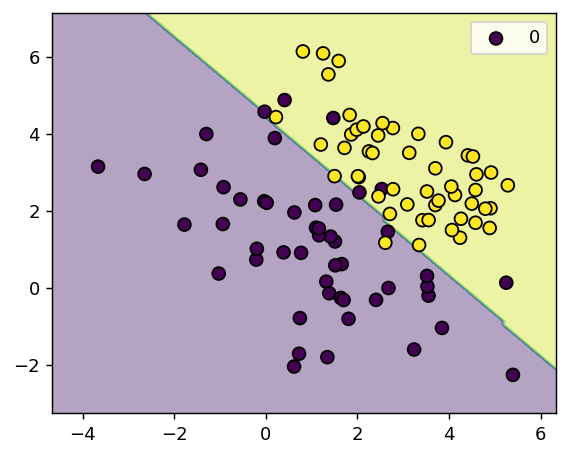

In [14]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))
print(X.shape, y.shape)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.legend(["0", "1"])
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)
  plt.show()

boundaryExp()

# The Kernel Trick

The true potential of SVMs is unleashed when they are combined with kernels.

## Kernels : An intuitive explanation

Kernel methods are essentially counting on using the training data (say $i^{th}$ example $(x_i, y_i)$ ) itself in a more straightforward way and learning a corresponding weight ($w_i$) for that example. Rather than trying to learn a fixed set of parameters which is done typically.
Depending on the kind of kernel used, we can virtually project the training data in a higher dimension to make it easier for the classifier to classify them.


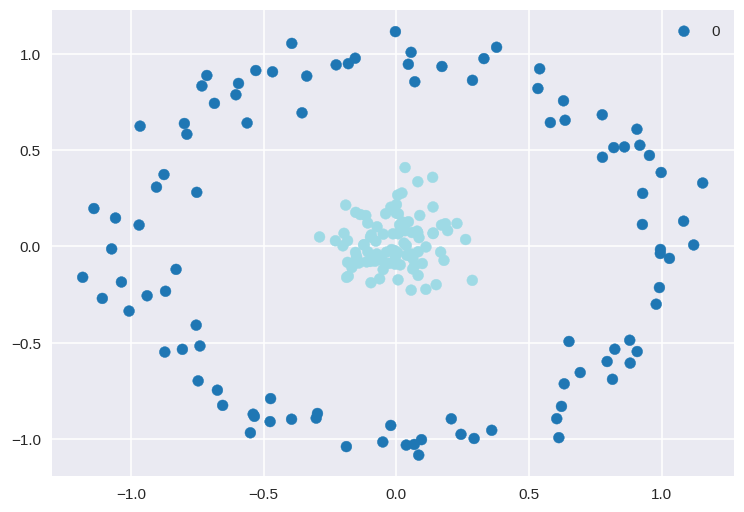

In [15]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.style.use("seaborn-v0_8")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)
plt.legend(["0", "1"])

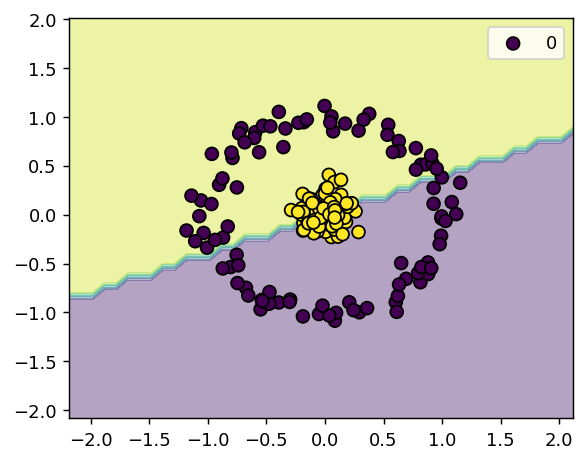

In [16]:
plt.style.use("default")
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

However, if we artificially add another dimention to the dataset of the form:

$z = x^2 + y^2$
we can clearly see a hyperplane that can distinguish both the datasets:

In [17]:
Z = np.array([[i[0]**2 + i[1]**2] for i in X])

In [18]:
X_new = np.hstack((X, Z))

In [19]:
import plotly.graph_objects as go
fig = go.Figure(data = [go.Scatter3d(
    x = X_new[:, 0],
    y = X_new[:, 1],
    z = X_new[:, 2],
    mode = "markers",
    marker = {
        "color" : y,
        "line": {"width" : 4, "color":'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

That simple trick has helped us to get another dimension in which the data is linearly separable by a hyperplane (in this case, a 2d plane)

---

Now let us use the rbf kernel and use an SVM Classifier.

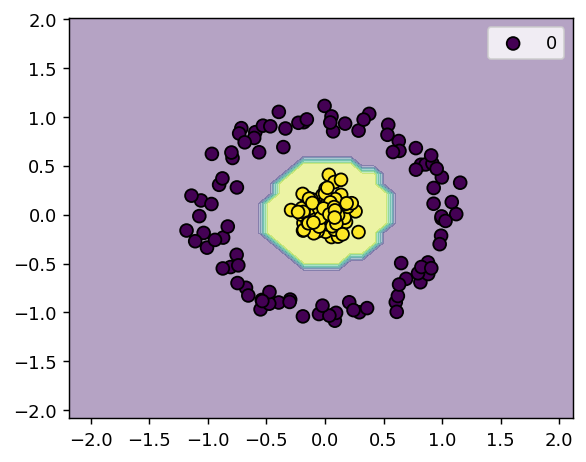

In [20]:
plt.style.use("default")
clf = svm.SVC(kernel='rbf')
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

Now let us get back to our original dataset of iris and see if this kernel trick has helped us:

In [21]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

Accuracy of the decision tree on the test set: 

0.974




Certainly, using a kernel has increased our accuracy on the iris dataset.


Tasks:

Task-1
Try to run the same experiment after filtering different features, 2 at a time.

Task-2
Use different kinds of kernels for the SVM and plot it for Iris dataset -
1. linear
2. poly
3. rbf
4. sigmoid
5. precomputed

Learning Tasks:
Learn about SVM types, support vectors and hyperplanes.

In [22]:
#Task-1 Try to run the same experiment after filtering different features, 2 at a time.
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
iris = load_iris()
X, y = iris.data, iris.target
# Get the number of features
num_features = X.shape[1]

# Iterate through all possible pairs of features
for i in range(num_features):
    for j in range(i + 1, num_features):
        # Select the current pair of features
        X_filtered = X[:, [i, j]]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            X_filtered, y, random_state=0
        )

        # Train an SVM classifier with a polynomial kernel
        clf = SVC(kernel="poly")
        clf.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = clf.predict(X_test)

        # Calculate the accuracy score
        accuracy = accuracy_score(y_pred, y_test)

        # Print the accuracy for the current feature pair
        print(
            f"Accuracy using features {iris.feature_names[i]} and {iris.feature_names[j]}: {accuracy:.3f}"
        )

Accuracy using features sepal length (cm) and sepal width (cm): 0.763
Accuracy using features sepal length (cm) and petal length (cm): 0.947
Accuracy using features sepal length (cm) and petal width (cm): 0.947
Accuracy using features sepal width (cm) and petal length (cm): 0.947
Accuracy using features sepal width (cm) and petal width (cm): 0.947
Accuracy using features petal length (cm) and petal width (cm): 0.974


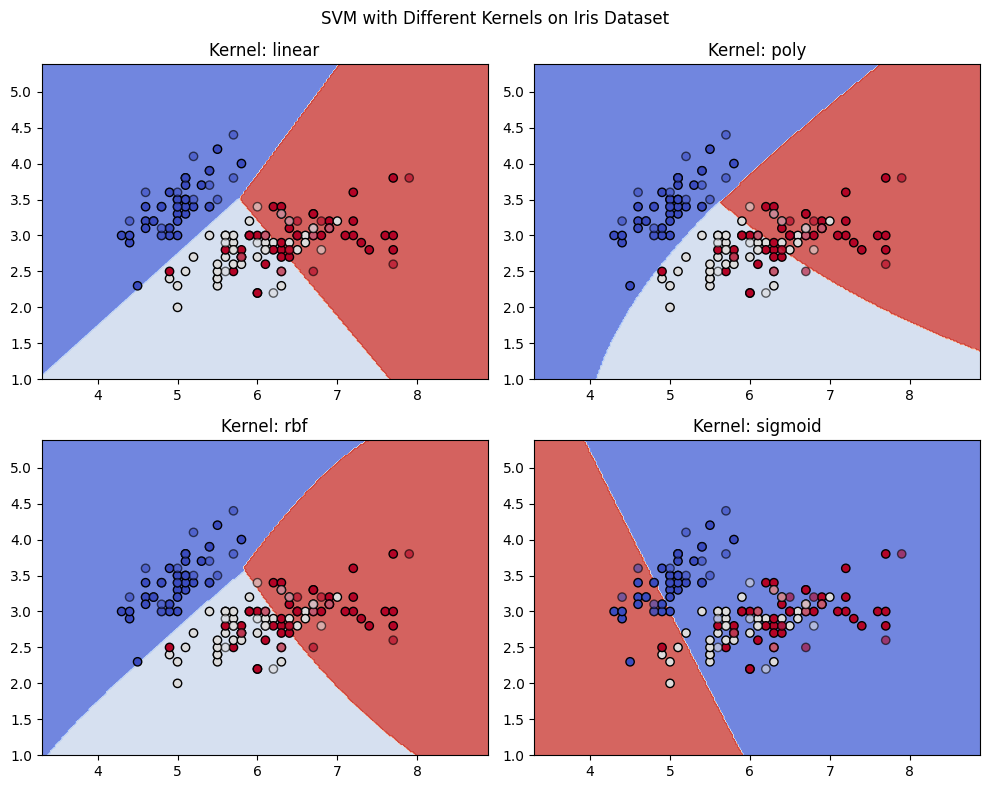

In [23]:
#Task-2 Use different kinds of kernels for the SVM and plot it for Iris dataset -linear,poly,rbf,sigmoid and precomputed
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take the first two features for visualization
y = iris.target

# Define the kernel types to use
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('SVM with Different Kernels on Iris Dataset')

# Iterate over the kernels and plot the decision boundaries
for i, kernel in enumerate(kernels):
    # Create an SVM classifier with the current kernel
    clf = svm.SVC(kernel=kernel)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Create a meshgrid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    # Plot the decision boundary
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axes[i // 2, i % 2].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the training points
    axes[i // 2, i % 2].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')

    # Plot the testing points
    axes[i // 2, i % 2].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', alpha=0.6)

    # Set the title for the subplot
    axes[i // 2, i % 2].set_title(f'Kernel: {kernel}')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# **Learning Tasks: Learn about SVM types, support vectors and hyperplanes.**

Support Vector Machines (SVMs)
SVMs are powerful supervised machine learning algorithms used for classification and regression tasks. They work by finding an optimal hyperplane that best separates data points into different classes.

SVM Types
There are two main types of SVMs:

Linear SVM: Used when the data is linearly separable, meaning a straight line or hyperplane can perfectly divide the data points into classes.
Non-linear SVM: Used when the data is not linearly separable. In this case, the kernel trick is applied to map the data into a higher-dimensional space where it becomes linearly separable.
Support Vectors
Support vectors are the data points that are closest to the hyperplane and have the most influence on its position. They are crucial for defining the decision boundary and are the only data points needed to make predictions on new data.

Hyperplanes
A hyperplane is a decision boundary that separates data points into different classes. In a 2D space, it's a line; in a 3D space, it's a plane; and in higher dimensions, it's a hyperplane. The optimal hyperplane is the one that maximizes the margin between the classes.

Margin
The margin is the distance between the hyperplane and the nearest data points (support vectors) of each class. The goal of SVM is to find the hyperplane that maximizes this margin, as it leads to better generalization and improved performance on unseen data.

Kernel Trick
The kernel trick is a technique used to transform data into a higher-dimensional space where it becomes linearly separable. It avoids the computational cost of explicitly calculating the coordinates in the higher-dimensional space. Popular kernels include:

Linear kernel: Used for linearly separable data.
Polynomial kernel: Creates a non-linear decision boundary by using polynomial functions.
Radial Basis Function (RBF) kernel: Creates a circular decision boundary around data points.
Sigmoid kernel: Similar to the sigmoid function used in logistic regression.
In summary:

SVM types: Linear and non-linear.
Support vectors: Data points closest to the hyperplane, influencing its position.
Hyperplanes: Decision boundaries separating data points into classes.
Margin: Distance between the hyperplane and the nearest data points.
Kernel trick: Technique to map data into a higher-dimensional space for linear separability.